In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.options.display.max_colwidth = 30

/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 체인 선별
1. 검증인 수 50 이상, proposal 수 40 이상인 체인
2. proposal 타입이 CommunityPoolSpend인 proposal과 나머지 타입 중 모든 투표의견 비율이 0.8보다 낮은 proposal이 15개 이상인 체인

In [2]:
import os
import pandas as pd
import numpy as np

folder_path = './new_data/'

# 모든 파일 불러오기 및 병합
alldf = [['chain_name', 'val_num', 'proposal_num', 'text_num', 'count_below_0_8', 'filtered_df']]
nodf = []
ptype = {}

# 각 파일마다 데이터를 불러와서 전처리 후 리스트에 추가
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        chain_name = file_name.replace('_proposals', '').replace('.csv', '')
        df = pd.read_csv(folder_path + file_name).drop(columns=['Unnamed: 0'])
        print(chain_name)
        
        # 불필요한 열 제거
        df = df.drop(columns=['txHash', 'txHeight', 'timeSubmit', 'proposer'], errors='ignore')
        
        val_num = df['countIncludeNoVotes'][0]
        proposal_num = len(df)
        community_num = len(df[df['type'] == 'CommunityPoolSpend'])
        text_num = len(df[df['type'] == 'Text'])
        count_below_0_8 = len(df[(df['ratioYes'] < 0.8) & (df['ratioNo'] < 0.8) & (df['ratioVeto'] < 0.8) & (df['ratioAbstain'] < 0.8)])
        filtered_df = len(df[(df['type'] == 'CommunityPoolSpend') | ((df['type'] != 'CommunityPoolSpend') & (df['ratioYes'] < 0.8) & (df['ratioNo'] < 0.8) & (df['ratioVeto'] < 0.8) & (df['ratioAbstain'] < 0.8))])
        alldf.append([chain_name, val_num, proposal_num, community_num, text_num, count_below_0_8, filtered_df])

alldf = pd.DataFrame(alldf).rename(columns={0: 'chain', 1: 'val_num', 2: 'proposal_num', 3: 'community_num', 4: 'text_num', 5: 'below_0.8_num', 6: 'filter_num'}).drop(index=0)
alldf['text_num'] = alldf['text_num'].astype(int)
condition = (alldf['val_num'] < 50) | (alldf['proposal_num'] < 40) | (alldf['filter_num'] < 15)

nodf = alldf[condition].reset_index(drop=True)
gdf = alldf[~condition].reset_index(drop=True)

chain_list = list(gdf['chain'])

gdf

cosmos
kava
injective
axelar
osmosis
terra
iris
evmos
dydx
secret
finschia
akash
kyve
stargaze
gravity-bridge
sentinel
juno


,chain,val_num,proposal_num,community_num,text_num,below_0.8_num,filter_num
0,cosmos,200.0,249,39,88,80,95.0
1,kava,92.0,188,0,0,108,108.0
2,injective,60.0,406,0,0,173,173.0
3,axelar,75.0,123,38,11,21,40.0
4,osmosis,150.0,791,0,0,208,208.0
5,terra,129.0,103,0,0,44,44.0
6,iris,113.0,85,0,0,17,17.0
7,dydx,60.0,175,0,0,15,15.0
8,secret,71.0,229,114,67,114,150.0
9,akash,100.0,95,43,15,21,53.0


In [3]:
df

,id,title,type,status,timeVotingStart,timeVotingEnd,voteYes,voteNo,voteNoWithVeto,voteAbstain,votes,countVotes,countIncludeNoVotes,countYes,countNo,countVeto,countAbstain,countNoVote,ratioYes,ratioNo,ratioVeto,ratioAbstain,ratioYesIncludeNoVotes,ratioNoIncludeNoVotes,ratioVetoIncludeNoVotes,ratioAbstainIncludeNoVotes,ratioNoVoteIncludeNoVotes,ratioYesVP,ratioNoVP,ratioVetoVP,ratioAbstainVP,ratioNoVoteVP,ratioVPtotal
0,357,Juno Treasury Housekeeping,/cosmwasm.wasm.v1.MsgExecu...,PASSED,1731057623637,1731489623637,3.032350e+07,3.613794e+04,2693.791824,1.985946e+06,"[{""voter"":""Stakewollecom ...",60.0,133.0,56.0,0.0,0.0,4.0,73.0,0.933333,0.000000,0.000000,0.066667,0.421053,0.000000,0.000000,0.030075,0.548872,0.527672,0.000000,0.000000,0.042232,0.131788,0.701692
1,356,Reactivate expired IBC cli...,/ibc.core.client.v1.Client...,PASSED,1727115646202,1727547646202,3.600866e+07,1.257068e+04,12089.977352,7.881661e+05,"[{""voter"":""Stakewollecom ...",68.0,128.0,67.0,0.0,0.0,1.0,60.0,0.985294,0.000000,0.000000,0.014706,0.523438,0.000000,0.000000,0.007812,0.468750,0.609590,0.000000,0.000000,0.012689,0.107220,0.729499
2,355,Juno Upgrade v25,/cosmos.upgrade.v1beta1.So...,PASSED,1726763769236,1727195769236,3.768375e+07,2.798512e+04,10977.966868,1.477772e+03,"[{""voter"":""Kalia Network"",...",75.0,134.0,74.0,0.0,1.0,0.0,59.0,0.986667,0.000000,0.013333,0.000000,0.552239,0.000000,0.007463,0.000000,0.440299,0.639054,0.000000,0.000001,0.000000,0.092143,0.731198
3,354,Juno Upgrade v24,/cosmos.upgrade.v1beta1.So...,PASSED,1724139385378,1724571385378,3.987644e+07,3.572134e+02,0.000000,6.333789e+03,"[{""voter"":""Stakefy"",""valid...",78.0,140.0,78.0,0.0,0.0,0.0,62.0,1.000000,0.000000,0.000000,0.000000,0.557143,0.000000,0.000000,0.000000,0.442857,0.653974,0.000000,0.000000,0.000000,0.103810,0.757784
4,353,Juno Communications SubDAO...,/cosmos.distribution.v1bet...,PASSED,1721857432490,1722289432490,1.743932e+07,2.832201e+06,19712.319252,1.846775e+07,"[{""voter"":""Kalia Network"",...",64.0,143.0,35.0,4.0,0.0,25.0,79.0,0.546875,0.062500,0.000000,0.390625,0.244755,0.027972,0.000000,0.174825,0.552448,0.282811,0.028955,0.000000,0.308967,0.178890,0.799623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6,Governance Proposal to set...,/cosmos.params.v1beta1.Par...,PASSED,1637617795220,1638049795220,8.882008e+06,2.880390e+03,0.000000,6.176140e+04,"[{""voter"":""Golden Ratio St...",58.0,150.0,58.0,0.0,0.0,0.0,92.0,1.000000,0.000000,0.000000,0.000000,0.386667,0.000000,0.000000,0.000000,0.613333,0.346524,0.000000,0.000000,0.000000,0.373224,0.719748
138,5,Increase Validator Set to 125,/cosmos.params.v1beta1.Par...,PASSED,1635674540076,1636106540076,7.947861e+06,1.242252e+04,1520.000000,7.462635e+05,"[{""voter"":""Crosnest"",""vali...",53.0,150.0,47.0,1.0,0.0,5.0,97.0,0.886792,0.018868,0.000000,0.094340,0.313333,0.006667,0.000000,0.033333,0.646667,0.244073,0.003687,0.000000,0.051107,0.441392,0.740259
139,4,Fixing Centralization From...,/cosmos.distribution.v1bet...,REJECTED,1634041738307,1634473738307,7.924051e+05,6.270963e+06,75129.189245,3.988168e+06,"[{""voter"":""kytzu"",""validat...",43.0,150.0,5.0,26.0,0.0,12.0,107.0,0.116279,0.604651,0.000000,0.279070,0.033333,0.173333,0.000000,0.080000,0.713333,0.012629,0.243383,0.000000,0.093421,0.381100,0.730533
140,3,Increase minimum commissio...,/cosmos.gov.v1beta1.TextPr...,PASSED,1633638063240,1634070063240,9.954587e+06,6.760514e+05,147072.150261,5.582747e+05,"[{""voter"":""01node"",""valida...",57.0,150.0,50.0,1.0,1.0,5.0,93.0,0.877193,0.017544,0.017544,0.087719,0.333333,0.006667,0.006667,0.033333,0.620000,0.305663,0.000000,0.002441,0.046707,0.357207,0.712018


# 검증인 투표 전처리

Row: 검증인(voter) <br>
Column: proposal(867) + chain(14) + voter(1)


| 체인 수 | 검증인 수 | Proposal 수 |
| :---: | :---: | :---: |
| 14 | 1233 | 894 |

In [4]:
import os
import json
import pandas as pd
import numpy as np

folder_path = './new_data/'

# 모든 파일 불러오기 및 병합
all_dfs = []
# 각 파일마다 데이터를 불러와서 전처리 후 리스트에 추가
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        chain_name = file_name.replace('_proposals', '').replace('.csv', '')
        df = pd.read_csv(folder_path + file_name).drop(columns=['Unnamed: 0'])
        
        if chain_name in chain_list:
            print(chain_name)
            
            # 불필요한 열 제거
            df = df.drop(columns=['txHash', 'txHeight', 'timeSubmit', 'proposer'], errors='ignore')

            # chain 열 추가
            df['chain'] = chain_name

            # CommunityPoolSpend 타입 필터링
            df = df[(df['type'] == 'CommunityPoolSpend') | ((df['type'] != 'CommunityPoolSpend') & (df['countVotes'] != 0) & (df['ratioYes'] < 0.8) & (df['ratioNo'] < 0.8) & (df['ratioVeto'] < 0.8) & (df['ratioAbstain'] < 0.8))]
            
            # validatorVotes 컬럼이 있는 경우에만 추가
            if 'votes' in df.columns:
                df['id'] = df['id'].astype(int)
                df = df[['votes', 'id', 'title', 'type', 'status', 'ratioYes', 'ratioNo', 'ratioVeto', 'ratioAbstain', 'countVotes', 'chain']]
                all_dfs.append(df)

# 모든 데이터프레임을 하나로 결합
combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df = combined_df.sort_values(by='id', ascending=True)

# validatorVotes를 기반으로 표 결합
votes_dict = {}
for idx, row in combined_df.iterrows():
    proposal_id = f"{row['chain']}_{row['id']}"
    
    # 'votes' 문자열을 JSON 리스트로 변환
    votes_list = json.loads(row['votes'])
    for vote in votes_list:
        voter = vote['voter']
        option = vote['option']
        
        if voter not in votes_dict:
            votes_dict[voter] = {}
        
        votes_dict[voter][proposal_id] = option
        votes_dict[voter][row['chain']] = 1

# dictionary를 DataFrame으로 변환
votes_df = pd.DataFrame.from_dict(votes_dict, orient='index')
votes_df = votes_df.reset_index(drop=False).rename(columns={'index': 'voter'})

votes_df = votes_df.dropna(subset=['voter']).reset_index(drop=True)
# votes_df.iloc[1852].value_counts()
subset_df = votes_df.drop(columns=['voter'], errors='ignore')

only_nan_no_vote_one_rows = subset_df[
    subset_df.apply(lambda row: row.isin([np.nan, 'NO_VOTE', 1.0]).all(), axis=1)
]
exclude_indices = only_nan_no_vote_one_rows.index

# 제외된 인덱스를 제거하고 새로운 데이터프레임 생성
votes_df = votes_df.drop(index=exclude_indices).reset_index(drop=True)

# 결과 확인
# votes_df
row_value_counts = votes_df.notna().sum(axis=1)

# 값이 10개 이하인 행 필터링 (제거)
# votes_df = votes_df[row_value_counts > 10].reset_index(drop=True)

# 결과 확인
# votes_df.to_csv('./streamlit/votes_clustering/validator_votes_all.csv')
# votes_df.to_csv('./validator_votes.csv')
votes_df


cosmos
kava
injective
axelar
osmosis
terra
iris
dydx
secret
akash
stargaze
gravity-bridge
sentinel
juno


,voter,osmosis_1,osmosis,osmosis_3,osmosis_5,osmosis_7,osmosis_22,osmosis_24,osmosis_29,osmosis_39,osmosis_50,osmosis_51,osmosis_55,osmosis_57,osmosis_58,osmosis_62,osmosis_72,osmosis_74,osmosis_76,osmosis_81,osmosis_82,osmosis_84,osmosis_96,osmosis_109,osmosis_111,osmosis_114,osmosis_120,osmosis_123,osmosis_130,osmosis_132,osmosis_133,osmosis_134,osmosis_135,osmosis_140,osmosis_141,osmosis_144,osmosis_146,osmosis_148,osmosis_149,osmosis_151,osmosis_152,osmosis_153,osmosis_156,osmosis_159,osmosis_163,osmosis_165,osmosis_166,osmosis_169,osmosis_170,osmosis_171,osmosis_173,osmosis_178,osmosis_180,osmosis_188,osmosis_190,osmosis_191,osmosis_211,osmosis_306,juno_4,juno,stargaze_11,stargaze,stargaze_15,juno_16,akash_16,akash,stargaze_16,stargaze_17,juno_18,juno_19,juno_20,stargaze_50,akash_52,stargaze_57,stargaze_58,stargaze_59,cosmos_60,cosmos,cosmos_63,cosmos_69,juno_72,cosmos_72,cosmos_75,cosmos_76,cosmos_77,cosmos_78,cosmos_79,cosmos_80,cosmos_81,stargaze_81,cosmos_82,juno_83,cosmos_83,juno_85,cosmos_86,cosmos_89,cosmos_90,cosmos_93,cosmos_94,stargaze_94,cosmos_99,cosmos_101,stargaze_104,juno_125,juno_141,osmosis_162,akash_182,akash_185,akash_187,osmosis_194,osmosis_195,osmosis_199,osmosis_200,osmosis_204,osmosis_206,osmosis_207,osmosis_208,osmosis_209,osmosis_216,osmosis_220,akash_229,akash_232,osmosis_232,akash_233,akash_234,akash_236,osmosis_237,akash_242,akash_243,akash_244,akash_245,akash_246,akash_247,akash_250,osmosis_251,akash_252,akash_253,akash_254,akash_255,osmosis_256,akash_261,osmosis_261,osmosis_262,akash_263,akash_266,osmosis_267,akash_268,osmosis_270,osmosis_271,osmosis_273,juno_284,juno_292,osmosis_305,juno_307,osmosis_309,osmosis_315,osmosis_316,osmosis_323,osmosis_326,osmosis_339,osmosis_342,osmosis_343,osmosis_349,osmosis_350,osmosis_362,osmosis_365,osmosis_367,osmosis_372,osmosis_378,osmosis_386,osmosis_388,osmosis_389,osmosis_390,osmosis_400,osmosis_402,osmosis_403,osmosis_419,osmosis_420,osmosis_421,osmosis_436,osmosis_442,osmosis_444,osmosis_451,osmosis_457,osmosis_480,osmosis_482,osmosis_492,osmosis_497,osmosis_498,osmosis_519,osmosis_530,osmosis_561,osmosis_564,osmosis_593,osmosis_610,osmosis_620,osmosis_638,osmosis_639,osmosis_640,osmosis_641,osmosis_645,osmosis_652,osmosis_655,cosmos_687,osmosis_688,osmosis_694,osmosis_700,osmosis_706,osmosis_707,osmosis_712,osmosis_741,osmosis_742,osmosis_755,osmosis_764,osmosis_785,cosmos_787,cosmos_791,cosmos_793,cosmos_800,cosmos_811,cosmos_814,cosmos_818,cosmos_826,cosmos_827,cosmos_836,cosmos_839,cosmos_848,cosmos_851,cosmos_853,cosmos_856,cosmos_858,cosmos_861,cosmos_862,cosmos_865,cosmos_867,cosmos_868,cosmos_895,cosmos_899,cosmos_912,cosmos_916,cosmos_917,cosmos_946,cosmos_952,cosmos_954,cosmos_956,osmosis_276,osmosis_277,osmosis_320,osmosis_352,osmosis_376,osmosis_394,osmosis_406,osmosis_417,osmosis_464,dydx_6,dydx,juno_7,akash_9,akash_14,juno_15,akash_22,akash_23,akash_24,iris_24,iris,dydx_24,iris_25,iris_26,akash_26,akash_28,iris_28,axelar_29,axelar,juno_30,akash_31,stargaze_35,juno_39,iris_41,dydx_44,iris_47,dydx_47,iris_48,dydx_48,iris_52,juno_59,juno_60,akash_63,cosmos_68,cosmos_73,iris_73,iris_74,cosmos_74,iris_76,iris_77,iris_78,iris_79,iris_84,iris_89,juno_89,cosmos_95,cosmos_98,stargaze_101,cosmos_103,cosmos_104,stargaze_128,dydx_138,dydx_142,stargaze_144,dydx_144,dydx_154,cosmos_155,dydx_156,dydx_157,dydx_164,dydx_165,axelar_166,axelar_167,axelar_168,axelar_169,axelar_170,axelar_171,axelar_172,injective_173,injective,axelar_174,dydx_175,dydx_176,axelar_178,axelar_188,axelar_190,axelar_191,axelar_192,axelar_193,injective_193,axelar_194,axelar_196,akash_199,axelar_199,akash_200,stargaze_200,axelar_200,axelar_201,cosmos_202,axelar_204,stargaze_205,axelar_206,akash_206,axelar_207,akash_207,akash_208,axelar_208,axelar_209,stargaze_210,axelar_211,axelar_212,axelar_213,stargaze_213,axelar_215,akash_216,axelar_216,axelar_217,axelar_218,axelar_219,axelar_220,axelar_222,axelar_223,stargaze_223,injective_226,stargaze_226,akash_230,akash_235,axelar_239,axelar

In [5]:
cols_to_keep = []
for col in votes_df.columns:
    unique_values = votes_df[col].dropna().unique()
    if len(unique_values) > 1 or (len(unique_values) == 1 and unique_values[0] != 'NO_VOTE'):
        cols_to_keep.append(col)

# 새로운 데이터프레임 생성
votes_df = votes_df[cols_to_keep]
votes_df

,voter,osmosis_1,osmosis,osmosis_3,osmosis_5,osmosis_7,osmosis_22,osmosis_24,osmosis_29,osmosis_39,osmosis_50,osmosis_51,osmosis_55,osmosis_57,osmosis_58,osmosis_62,osmosis_72,osmosis_74,osmosis_76,osmosis_81,osmosis_82,osmosis_84,osmosis_96,osmosis_109,osmosis_111,osmosis_114,osmosis_120,osmosis_123,osmosis_130,osmosis_132,osmosis_133,osmosis_134,osmosis_135,osmosis_140,osmosis_141,osmosis_144,osmosis_146,osmosis_148,osmosis_149,osmosis_151,osmosis_152,osmosis_153,osmosis_156,osmosis_159,osmosis_163,osmosis_165,osmosis_166,osmosis_169,osmosis_170,osmosis_171,osmosis_173,osmosis_178,osmosis_180,osmosis_188,osmosis_190,osmosis_191,osmosis_211,osmosis_306,juno_4,juno,stargaze_11,stargaze,stargaze_15,juno_16,akash_16,akash,stargaze_16,stargaze_17,juno_18,juno_19,juno_20,stargaze_50,akash_52,stargaze_57,stargaze_58,stargaze_59,cosmos_60,cosmos,cosmos_63,cosmos_69,juno_72,cosmos_72,cosmos_75,cosmos_76,cosmos_77,cosmos_78,cosmos_79,cosmos_80,cosmos_81,stargaze_81,cosmos_82,juno_83,cosmos_83,juno_85,cosmos_86,cosmos_89,cosmos_90,cosmos_93,cosmos_94,stargaze_94,cosmos_99,cosmos_101,stargaze_104,juno_125,juno_141,osmosis_162,akash_182,akash_185,akash_187,osmosis_194,osmosis_195,osmosis_199,osmosis_200,osmosis_204,osmosis_206,osmosis_207,osmosis_208,osmosis_209,osmosis_216,osmosis_220,akash_229,akash_232,osmosis_232,akash_233,akash_234,akash_236,osmosis_237,akash_242,akash_243,akash_244,akash_245,akash_246,akash_247,akash_250,osmosis_251,akash_252,akash_253,akash_254,akash_255,osmosis_256,akash_261,osmosis_261,osmosis_262,akash_263,akash_266,osmosis_267,akash_268,osmosis_270,osmosis_271,osmosis_273,juno_284,juno_292,osmosis_305,juno_307,osmosis_309,osmosis_315,osmosis_316,osmosis_323,osmosis_326,osmosis_339,osmosis_342,osmosis_343,osmosis_349,osmosis_350,osmosis_362,osmosis_365,osmosis_367,osmosis_372,osmosis_378,osmosis_386,osmosis_388,osmosis_389,osmosis_390,osmosis_400,osmosis_402,osmosis_403,osmosis_419,osmosis_420,osmosis_421,osmosis_436,osmosis_442,osmosis_444,osmosis_451,osmosis_457,osmosis_480,osmosis_482,osmosis_492,osmosis_497,osmosis_498,osmosis_519,osmosis_530,osmosis_561,osmosis_564,osmosis_593,osmosis_610,osmosis_620,osmosis_638,osmosis_639,osmosis_640,osmosis_641,osmosis_645,osmosis_652,osmosis_655,cosmos_687,osmosis_688,osmosis_694,osmosis_700,osmosis_706,osmosis_707,osmosis_712,osmosis_741,osmosis_742,osmosis_755,osmosis_764,osmosis_785,cosmos_787,cosmos_791,cosmos_793,cosmos_800,cosmos_811,cosmos_814,cosmos_818,cosmos_826,cosmos_827,cosmos_836,cosmos_839,cosmos_848,cosmos_851,cosmos_853,cosmos_856,cosmos_858,cosmos_861,cosmos_862,cosmos_865,cosmos_867,cosmos_868,cosmos_895,cosmos_899,cosmos_912,cosmos_916,cosmos_917,cosmos_946,cosmos_952,cosmos_954,cosmos_956,osmosis_276,osmosis_277,osmosis_320,osmosis_352,osmosis_376,osmosis_394,osmosis_406,osmosis_417,osmosis_464,dydx_6,dydx,juno_7,akash_9,akash_14,juno_15,akash_22,akash_23,akash_24,iris_24,iris,dydx_24,iris_25,iris_26,akash_26,akash_28,iris_28,axelar_29,axelar,juno_30,akash_31,stargaze_35,juno_39,iris_41,dydx_44,iris_47,dydx_47,iris_48,dydx_48,iris_52,juno_59,juno_60,akash_63,cosmos_68,cosmos_73,iris_73,iris_74,cosmos_74,iris_76,iris_77,iris_78,iris_79,iris_84,iris_89,juno_89,cosmos_95,cosmos_98,stargaze_101,cosmos_103,cosmos_104,stargaze_128,dydx_138,dydx_142,stargaze_144,dydx_144,dydx_154,cosmos_155,dydx_156,dydx_157,dydx_164,dydx_165,axelar_166,axelar_167,axelar_168,axelar_169,axelar_170,axelar_171,axelar_172,injective_173,injective,axelar_174,dydx_175,dydx_176,axelar_178,axelar_188,axelar_190,axelar_191,axelar_192,axelar_193,injective_193,axelar_194,axelar_196,akash_199,axelar_199,akash_200,stargaze_200,axelar_200,axelar_201,cosmos_202,axelar_204,stargaze_205,axelar_206,akash_206,axelar_207,akash_207,akash_208,axelar_208,axelar_209,stargaze_210,axelar_211,axelar_212,axelar_213,stargaze_213,axelar_215,akash_216,axelar_216,axelar_217,axelar_218,axelar_219,axelar_220,axelar_222,axelar_223,stargaze_223,injective_226,stargaze_226,akash_230,akash_235,axelar_239,axelar

# KMEANS 클러스터링

- 14개가 가장 적절한 클러스터 수로 판단됨

/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/108483868.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_df['cluster_label'] = clusters
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/108483868.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)


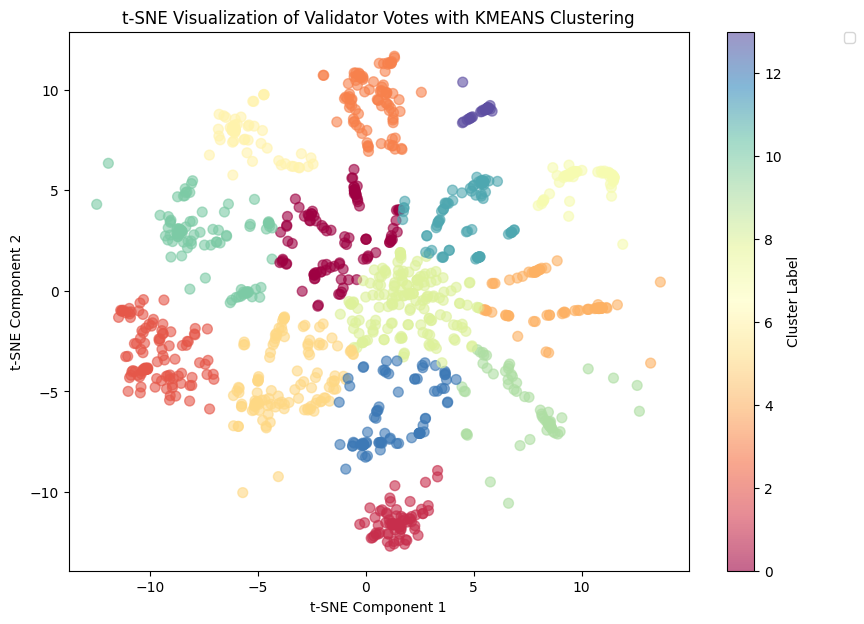

0 
8     160
5     122
2     116
0     106
10     99
3      91
12     80
11     79
1      78
4      73
9      71
6      67
7      61
13     30
Name: count, dtype: int64
0    13
dtype: int32


In [6]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop column
columns_to_drop = ['voter'] + chain_list
data_cleaned = votes_df.drop(columns=columns_to_drop, errors='ignore')
data_encoded = data_cleaned.apply(LabelEncoder().fit_transform)

# T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_encoded)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=14, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

# 클러스터 레이블을 기존 데이터에 추가
votes_df['cluster_label'] = clusters

chain_centers = {}

for chain in chain_list:
    chain_data = tsne_results[votes_df[chain] == 1]
    center_x, center_y = chain_data.mean(axis=0)
    chain_centers[chain] = (center_x, center_y)


selected_chain = chain_list[2]

# Visualization with central points
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap="Spectral", alpha=0.6, s=50)

plt.colorbar(scatter, label="Cluster Label")
plt.title("t-SNE Visualization of Validator Votes with KMEANS Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)
plt.show()

# 클러스터 레이블의 빈도수 출력
print(pd.DataFrame(clusters).value_counts())
print(pd.DataFrame(clusters).max())

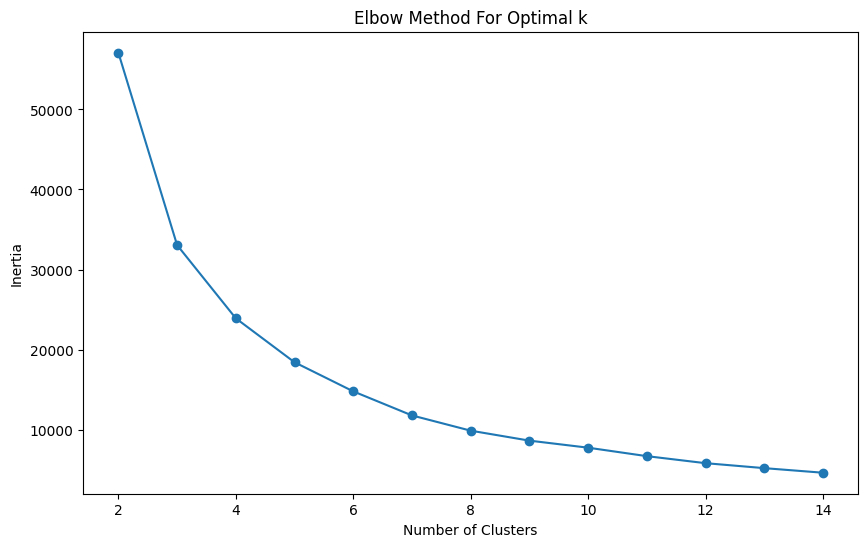

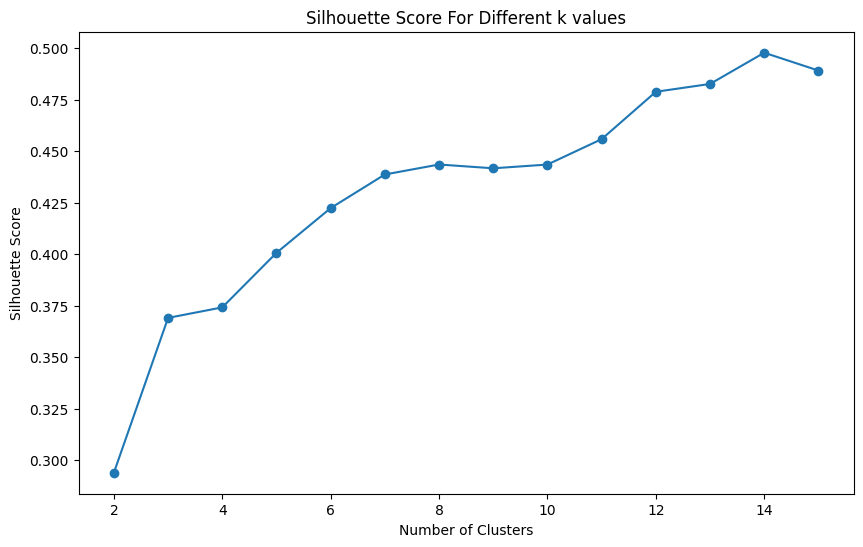

In [7]:
from sklearn.metrics import silhouette_score

# Elbow 차트 코드 (KMeans로 클러스터 수 선택)
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# 실루엣 점수 확인 코드 (KMeans로 여러 클러스터 수에 대해 확인)
silhouette_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tsne_results)
    silhouette_avg = silhouette_score(tsne_results, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), silhouette_scores, marker='o')
plt.title("Silhouette Score For Different k values")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/725199289.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_df['cluster_label'] = clusters


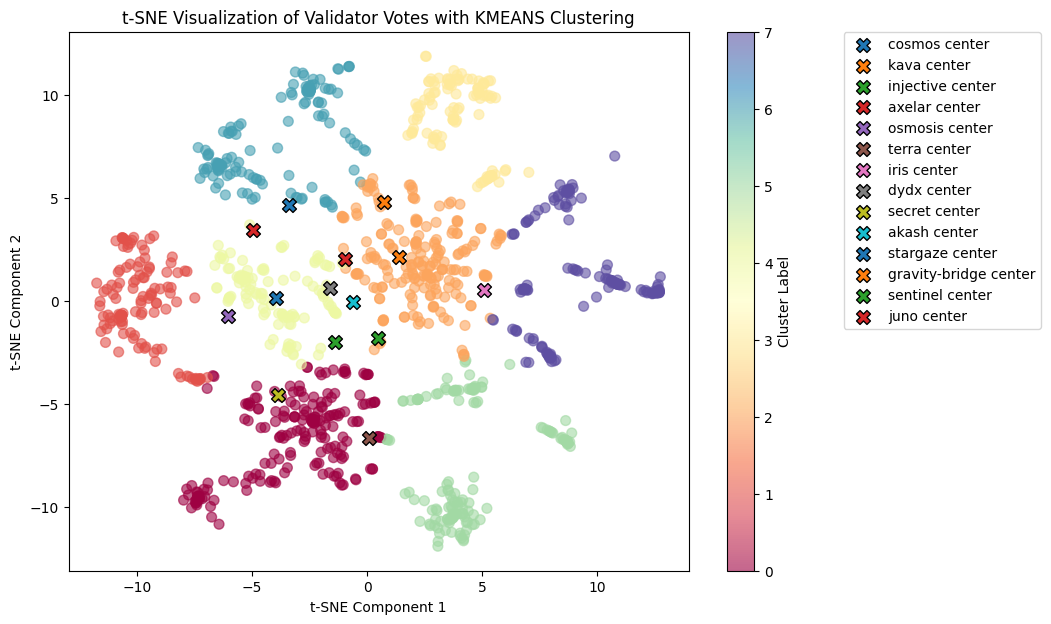

0
0    216
2    212
5    158
7    148
6    144
1    130
4    114
3    111
Name: count, dtype: int64
0    7
dtype: int32


In [28]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop column
columns_to_drop = ['voter'] + chain_list
data_cleaned = votes_df.drop(columns=columns_to_drop, errors='ignore')
data_encoded = data_cleaned.apply(LabelEncoder().fit_transform)

# T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_encoded)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=8, random_state=10)
clusters = kmeans.fit_predict(tsne_results)

# 클러스터 레이블을 기존 데이터에 추가
votes_df['cluster_label'] = clusters

chain_centers = {}

for chain in chain_list:
    chain_data = tsne_results[votes_df[chain] == 1]
    center_x, center_y = chain_data.mean(axis=0)
    chain_centers[chain] = (center_x, center_y)

selected_chain = chain_list[2]

# Visualization with central points
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap="Spectral", alpha=0.6, s=50)

plt.colorbar(scatter, label="Cluster Label")
plt.title("t-SNE Visualization of Validator Votes with KMEANS Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Display all central points from chain_list
for chain, (center_x, center_y) in chain_centers.items():
    plt.scatter(center_x, center_y, marker='X', s=100, label=f'{chain} center', edgecolor='black')

plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)
plt.show()

# 클러스터 레이블의 빈도수 출력
print(pd.DataFrame(clusters).value_counts())
print(pd.DataFrame(clusters).max())


In [29]:
votes_df.to_csv('./complete_data/validator_votes.csv')
votes_df.to_json('./complete_data/validator_votes.json', orient='records')

## 포용력 계산

In [30]:
import numpy as np

# Dictionary to store the radius for each chain
chain_radii = {}

for chain, (center_x, center_y) in chain_centers.items():
    # Get data points corresponding to the chain
    chain_data = tsne_results[votes_df[chain] == 1]
    
    # Calculate distances from the center to each node in the chain
    distances = np.sqrt((chain_data[:, 0] - center_x) ** 2 + (chain_data[:, 1] - center_y) ** 2)
    
    # Find the maximum distance (radius)
    chain_radii[chain] = distances.max()

# Print the radius for each chain
print("Radius for each chain:")
for chain, radius in chain_radii.items():
    print(f"{chain}: {radius}")


Radius for each chain:
cosmos: 14.620152473449707
kava: 15.079047203063965
injective: 11.792556762695312
axelar: 13.65652084350586
osmosis: 16.24631118774414
terra: 17.447864532470703
iris: 16.527746200561523
dydx: 11.84376049041748
secret: 15.42435359954834
akash: 12.412554740905762
stargaze: 17.73691177368164
gravity-bridge: 16.636470794677734
sentinel: 13.388242721557617
juno: 17.084680557250977


In [31]:
chain_centers, chain_radii

({'cosmos': (-3.943445, 0.17107223),
  'kava': (1.4053261, 2.1469505),
  'injective': (-1.4166188, -2.0024261),
  'axelar': (-0.95287716, 2.055591),
  'osmosis': (-6.045353, -0.7473718),
  'terra': (0.0955178, -6.6272826),
  'iris': (5.0698686, 0.546187),
  'dydx': (-1.6190424, 0.611328),
  'secret': (-3.8975527, -4.551802),
  'akash': (-0.6047692, -0.031301863),
  'stargaze': (-3.3877115, 4.63158),
  'gravity-bridge': (0.7283889, 4.8167033),
  'sentinel': (0.45659924, -1.7977136),
  'juno': (-4.949989, 3.4234946)},
 {'cosmos': 14.620152,
  'kava': 15.079047,
  'injective': 11.792557,
  'axelar': 13.656521,
  'osmosis': 16.246311,
  'terra': 17.447865,
  'iris': 16.527746,
  'dydx': 11.8437605,
  'secret': 15.424354,
  'akash': 12.412555,
  'stargaze': 17.736912,
  'gravity-bridge': 16.63647,
  'sentinel': 13.388243,
  'juno': 17.08468})

In [32]:
chain_data = {
    chain: {'center': center, 'radius': chain_radii[chain]}
    for chain, center in chain_centers.items()
}
chain_data

{'cosmos': {'center': (-3.943445, 0.17107223), 'radius': 14.620152},
 'kava': {'center': (1.4053261, 2.1469505), 'radius': 15.079047},
 'injective': {'center': (-1.4166188, -2.0024261), 'radius': 11.792557},
 'axelar': {'center': (-0.95287716, 2.055591), 'radius': 13.656521},
 'osmosis': {'center': (-6.045353, -0.7473718), 'radius': 16.246311},
 'terra': {'center': (0.0955178, -6.6272826), 'radius': 17.447865},
 'iris': {'center': (5.0698686, 0.546187), 'radius': 16.527746},
 'dydx': {'center': (-1.6190424, 0.611328), 'radius': 11.8437605},
 'secret': {'center': (-3.8975527, -4.551802), 'radius': 15.424354},
 'akash': {'center': (-0.6047692, -0.031301863), 'radius': 12.412555},
 'stargaze': {'center': (-3.3877115, 4.63158), 'radius': 17.736912},
 'gravity-bridge': {'center': (0.7283889, 4.8167033), 'radius': 16.63647},
 'sentinel': {'center': (0.45659924, -1.7977136), 'radius': 13.388243},
 'juno': {'center': (-4.949989, 3.4234946), 'radius': 17.08468}}

## Voronoi diagram

<Figure size 1000x1000 with 0 Axes>

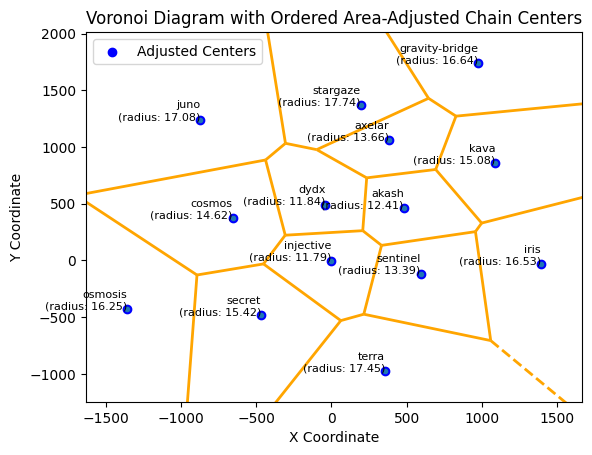

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# 반지름에 제곱을 적용한 넓이를 사용하여 중심 좌표를 조정
def adjust_centers_using_squared_area_in_order(data):
    # 반지름 순으로 체인들을 오름차순 정렬
    sorted_chains = sorted(data.items(), key=lambda x: x[1]['radius'])
    adjusted_centers = {chain: values['center'] for chain, values in sorted_chains}
    
    # 작은 반지름의 체인부터 큰 반지름의 체인 순으로 위치를 조정
    for i, (chain, values) in enumerate(sorted_chains):
        x, y = adjusted_centers[chain]
        radius = values['radius']
        squared_area = (np.pi * (radius ** 2)) ** 2  # 넓이의 제곱을 사용하여 영역 차이를 크게
        
        # 현재 체인 이후의 체인들을 순차적으로 밀어내기
        for j in range(i + 1, len(sorted_chains)):
            other_chain, other_values = sorted_chains[j]
            other_x, other_y = adjusted_centers[other_chain]
            other_radius = other_values['radius']
            other_squared_area = (np.pi * (other_radius ** 2)) ** 2
            
            # 두 체인 사이의 거리 계산 및 필요한 최소 거리 계산
            distance = np.sqrt((x - other_x) ** 2 + (y - other_y) ** 2)
            required_distance = np.sqrt(squared_area / np.pi) + np.sqrt(other_squared_area / np.pi)
            
            # 겹치는 경우 밀어내기
            if distance < required_distance:
                dx = other_x - x
                dy = other_y - y
                if dx == 0 and dy == 0:  # Prevent zero division
                    dx, dy = 1, 1
                norm = np.sqrt(dx ** 2 + dy ** 2)
                dx /= norm
                dy /= norm
                push_distance = required_distance - distance
                adjusted_centers[other_chain] = (other_x + dx * push_distance, other_y + dy * push_distance)
    
    return adjusted_centers

def plot_voronoi(adjusted_centers, data):
    points = np.array(list(adjusted_centers.values()))
    vor = Voronoi(points)

    # Plot Voronoi diagram
    plt.figure(figsize=(10, 10))
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2)
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Adjusted Centers')
    
    # Annotate chain names with their radius
    for name, (x, y) in adjusted_centers.items():
        radius = data[name]['radius']
        plt.text(x, y, f"{name}\n(radius: {radius:.2f})", fontsize=8, ha='right')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Voronoi Diagram with Ordered Area-Adjusted Chain Centers')
    plt.legend()
    plt.show()

# Calculate adjusted centers using squared area and ordered pushing to avoid overlap
adjusted_chain_centers = adjust_centers_using_squared_area_in_order(chain_data)

# Plot the Voronoi diagram with ordered area-adjusted centers, including radius annotation
plot_voronoi(adjusted_chain_centers, chain_data)


# 체인 데이터 전처리

In [34]:
cd = {
    chain: {'x-axis': center[0], 'y-axis': center[1], 'radius': chain_radii[chain]}
    for chain, center in chain_centers.items()
}
cd

{'cosmos': {'x-axis': -3.943445, 'y-axis': 0.17107223, 'radius': 14.620152},
 'kava': {'x-axis': 1.4053261, 'y-axis': 2.1469505, 'radius': 15.079047},
 'injective': {'x-axis': -1.4166188,
  'y-axis': -2.0024261,
  'radius': 11.792557},
 'axelar': {'x-axis': -0.95287716, 'y-axis': 2.055591, 'radius': 13.656521},
 'osmosis': {'x-axis': -6.045353, 'y-axis': -0.7473718, 'radius': 16.246311},
 'terra': {'x-axis': 0.0955178, 'y-axis': -6.6272826, 'radius': 17.447865},
 'iris': {'x-axis': 5.0698686, 'y-axis': 0.546187, 'radius': 16.527746},
 'dydx': {'x-axis': -1.6190424, 'y-axis': 0.611328, 'radius': 11.8437605},
 'secret': {'x-axis': -3.8975527, 'y-axis': -4.551802, 'radius': 15.424354},
 'akash': {'x-axis': -0.6047692, 'y-axis': -0.031301863, 'radius': 12.412555},
 'stargaze': {'x-axis': -3.3877115, 'y-axis': 4.63158, 'radius': 17.736912},
 'gravity-bridge': {'x-axis': 0.7283889,
  'y-axis': 4.8167033,
  'radius': 16.63647},
 'sentinel': {'x-axis': 0.45659924, 'y-axis': -1.7977136, 'radius

In [35]:
pndf = pd.DataFrame(cd).transpose().reset_index().rename(columns={'index': 'chain'})
pndf.to_csv('./chain_data.csv')
pndf

,chain,x-axis,y-axis,radius
0,cosmos,-3.943445,0.171072,14.620152
1,kava,1.405326,2.146950,15.079047
2,injective,-1.416619,-2.002426,11.792557
3,axelar,-0.952877,2.055591,13.656521
4,osmosis,-6.045353,-0.747372,16.246311
5,terra,0.095518,-6.627283,17.447865
6,iris,5.069869,0.546187,16.527746
7,dydx,-1.619042,0.611328,11.843760
8,secret,-3.897553,-4.551802,15.424354
9,akash,-0.604769,-0.031302,12.412555


## 검증인 데이터 시각화

In [36]:
chain_list

['cosmos',
 'kava',
 'injective',
 'axelar',
 'osmosis',
 'terra',
 'iris',
 'dydx',
 'secret',
 'akash',
 'stargaze',
 'gravity-bridge',
 'sentinel',
 'juno']

/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/7867332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tsne_x'] = tsne_results_filtered[:, 0]
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/7867332.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_d

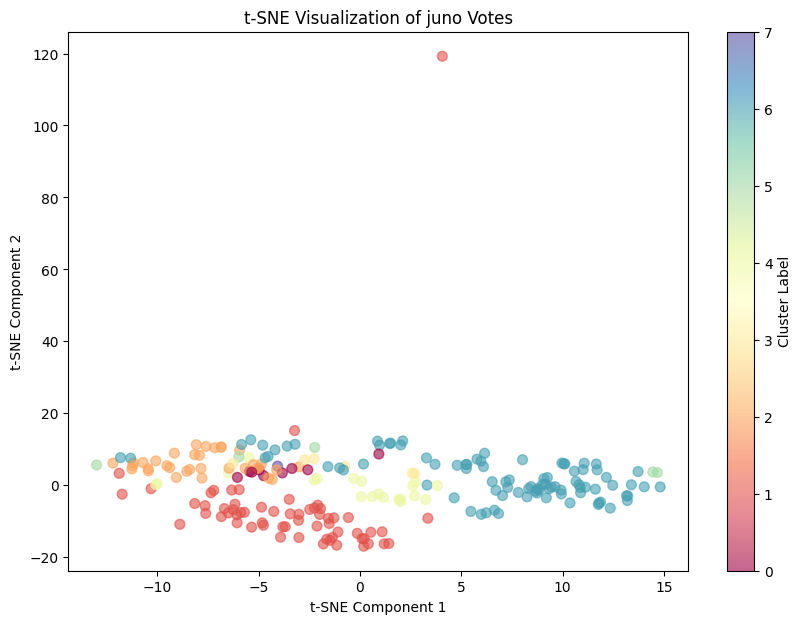

In [38]:
ch = 'gravity-bridge'
ch = 'juno'
# 클러스터 레이블과 특정 열이 NaN이 아닌 데이터 필터링
filtered_data = votes_df[(~votes_df[ch].isna())]

# 필터링된 데이터에서 군집화를 위한 전처리
data_cleaned_filtered = filtered_data.drop(columns=['voter', 'cluster_label'])  # 'voter'와 'cluster_label' 제거
data_encoded_filtered = data_cleaned_filtered.apply(LabelEncoder().fit_transform)

# T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=300)
tsne_results_filtered = tsne.fit_transform(data_encoded_filtered)

# 클러스터 레이블 추가
filtered_data['tsne_x'] = tsne_results_filtered[:, 0]
filtered_data['tsne_y'] = tsne_results_filtered[:, 1]

# Visualization with clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(filtered_data['tsne_x'], filtered_data['tsne_y'], 
                      c=filtered_data['cluster_label'], cmap="Spectral", alpha=0.6, s=50)
plt.colorbar(scatter, label="Cluster Label")
plt.title(f"t-SNE Visualization of {ch} Votes")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## 검증인 데이터 전처리

In [40]:
chain_val_dict = {}

for ch in chain_list:
    # 클러스터 레이블과 특정 열이 NaN이 아닌 데이터 필터링
    filtered_data = votes_df[(~votes_df[ch].isna())]

    # 필터링된 데이터에서 군집화를 위한 전처리
    data_cleaned_filtered = filtered_data.drop(columns=['voter', 'cluster_label'])  # 'voter'와 'cluster_label' 제거
    data_encoded_filtered = data_cleaned_filtered.apply(LabelEncoder().fit_transform)

    # T-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=300)
    tsne_results_filtered = tsne.fit_transform(data_encoded_filtered)

    # 클러스터 레이블 추가
    filtered_data['tsne_x'] = tsne_results_filtered[:, 0]
    filtered_data['tsne_y'] = tsne_results_filtered[:, 1]

    if ch == 'juno' or ch == 'akash':
        print(ch)
        filtered_data = filtered_data[~(filtered_data['tsne_y'] > 60)].reset_index(drop=True)

    # cdf = pd.read_csv(f'./validators/validators-of-{ch}-selected-csv.csv')
    # cdf['timestamp'] = pd.to_datetime(cdf['timestamp'], unit='ms')
    # vpdf = cdf[cdf['timestamp'] == '2024-11-15'][['moniker', 'votingPower']].rename(columns={'moniker': 'voter'})
    nsdf = pd.read_csv(f'./complete_data/validator_result_data/validator_result_{ch}.csv').drop(columns='Unnamed: 0')[['voter', 'participation_rate']]
    chain_val_dict[ch] = filtered_data[['voter', 'cluster_label', 'tsne_x', 'tsne_y']].reset_index(drop=True).merge(nsdf, how='inner', on='voter')
    chain_val_dict[ch] = chain_val_dict[ch].drop_duplicates(subset='voter').reset_index(drop=True)
    chain_val_dict[ch].to_csv(f'./complete_data/scatter_data/scatter_{ch}.csv')
    chain_val_dict[ch].to_json(f'./complete_data/scatter_data/scatter_{ch}.json', orient='records')

/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/1764081156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tsne_x'] = tsne_results_filtered[:, 0]
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/1764081156.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt

akash


/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/1764081156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tsne_x'] = tsne_results_filtered[:, 0]
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/1764081156.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tsne_y'] = tsne_results_filtered[:, 1]
/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version

juno


/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/1764081156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tsne_x'] = tsne_results_filtered[:, 0]
/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_2738/1764081156.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tsne_y'] = tsne_results_filtered[:, 1]


In [41]:
chain_val_dict['juno']

,voter,cluster_label,tsne_x,tsne_y,participation_rate
0,Chainflow,1,-3.440635,-7.932773,0.276596
1,Imperatorco,1,1.193419,-16.261557,0.978723
2,AutoStake Slash Protected,1,-1.807473,-16.288782,0.574468
3,Provalidator,1,-1.520280,-10.620388,0.808511
4,Simply Staking,1,-4.822271,-10.433391,0.617021
...,...,...,...,...,...
220,Validavia,2,-4.111298,4.307565,0.106383
221,nRidecom Validator,0,-2.575132,4.314192,0.212766
222,Antrix Validators,0,-3.358344,4.666214,0.297872
223,SoloNationio,2,-5.025856,4.764727,0.021277


In [39]:
nsdf = pd.read_csv(f'./complete_data/validator_result_data/validator_result_{ch}.csv').drop(columns='Unnamed: 0')[['voter', 'participation_rate']]

,voter,yes,no,veto,abstain,no_vote,valid_votes,total_votes,proposal_num,overall_match,cluster_match,overall_match_rate,cluster_match_rate,participation_rate,cluster_label,Chainflow,Imperatorco,AutoStake Slash Protected,StakeWithUs,Simply Staking,StakeLabzone,SpacePotato,Vitwit Previously Witval,SG1,Chorus One,Forbole,POSTHUMAN StakeDrop,Ping,0basevc,Smart Stake,block pane,WhisperNode,a41,Stakyio,Kahuna,16psyche,Nocturnal Labs,decentralizehk DHK dao,Kalia Network,ECO Stake,NosNode,Citadelone,Informal Systems,LavenderFive Nodes,Frens,Cosmostation,Kleomedes,OmniFlix Network,GATA HUB,hydrogen18,Coinage x DAIC,Stakecito,Meria,BronBro,Cypher Core,ChainLayer,Active Nodes,DACM,strangelove,ushakov,c29r3,Allnodes,PoS Node,Tedcryptoio TedLotto,kooltek68,CroutonDigital,coaction,EZ Staking,Stakin,notional,WeStaking,SmartNodes Slash Protected,Yurbason,Neta DAO,Chandra Station,Stake Frites,Decloud Nodes Lab,HashKey Cloud,chainvibes,Consensus One,Stakewollecom Autocompound,Wetez,Architect Nodes,HEXXAGON,DECOMISSIONED AUDITone,Army IDs,Bit Cat,Easy 2 Stake,Nodeasycom,jetlife,Bliss Dynamics,Sikka,PLEASE REDELEGATECLOSED,SNZPool,Autonomy Formerly PrithviDevs,Baset,Huobi,ChainodeTech,kano,Cosmic Validator Auto Compound,ValidatorNode,UNDELEGATE FROM HERE,stakezone,gunray,Bi23,Psycho Node,Bitoven,Komichaincom,BoxedCloudnet,MANTRA,eol,cosmosrescue,SkyNet Validators,Cosmonaut Stakes AKT,Dwebnet,DLINODESCOM,GlacierLuo,Domination Finance,Arcturian Tech,Akash Af,ALTER pathrocknetwork,decommissioned,BridgeTower,Dora Factory PGS,MedasDigital,STAKINOLD,Cloudmos,Former Moultrie Audits Inactive,MOVING TO NAKANODOXYZ,VaultStaking,TRGC By Liquify,astravoyage,Anonstake,polkachucom,kavalabs,AGE Network,acheron,Octopos,shepaintedfireacrossthesky,monolith,SHEA Staking,Dorminik,UNBONDING,Inactive pls undelegate,GreenStake One,inactive,Oni Stake for BoostDrop,Praetor App,0xDEADBEEF,w3coins,Vixello,Aurora Staking,50 Validator Airdrop,Passage,NoDumpNode,Jormungand 0y,INACTIVE Please Redelegate Trivium TriviumNetwork,StakeSeeker by BTCS,Crypto Lab Tech,europlots,CryptoCrew Validators,Quasarch,Ariel Akash Insider Powered by NextNetWorks,Atomstaking,black lodge,SHUTTING DOWN,Crypto and Coffee,FoundryUSA,OGnome,Defi Dojo Validation,high_similarity_voters
0,Chainflow,20,1,0,4,0,25,25,50,20,21,0.800000,0.840000,0.50,3,1.00,0.24,0.28,0.32,0.28,0.12,0.20,0.30,0.06,0.38,0.22,0.34,0.14,0.40,0.12,0.00,0.28,0.0,0.00,0.12,0.28,0.36,0.30,0.38,0.36,0.30,0.28,0.26,0.34,0.06,0.40,0.18,0.22,0.26,0.02,0.14,0.36,0.36,0.0,0.36,0.28,0.36,0.18,0.20,0.02,0.32,0.32,0.36,0.32,0.26,0.04,0.00,0.26,0.28,0.08,0.28,0.02,0.0,0.34,0.12,0.34,0.36,0.04,0.38,0.02,0.36,0.04,0.00,0.0,0.00,0.42,0.10,0.24,0.28,0.04,0.32,0.02,0.02,0.02,0.20,0.00,0.04,0.24,0.00,0.32,0.38,0.02,0.04,0.00,0.24,0.02,0.24,0.34,0.08,0.0,0.00,0.06,0.04,0.28,0.02,0.00,0.00,0.02,0.04,0.12,0.12,0.0,0.24,0.30,0.0,0.02,0.38,0.00,0.02,0.02,0.12,0.02,0.38,0.38,0.06,0.06,0.00,0.00,0.0,0.00,0.00,0.20,0.00,0.06,0.00,0.00,0.20,0.36,0.00,0.28,0.16,0.22,0.32,0.00,0.32,0.22,0.00,0.10,0.20,0.34,0.00,0.34,0.12,0.34,0.04,0.0,0.16,0.22,0.02,0.04,[]
1,Imperatorco,23,4,1,21,0,49,49,50,25,29,0.510204,0.591837,0.98,3,0.24,1.00,0.72,0.52,0.48,0.22,0.28,0.36,0.12,0.48,0.42,0.38,0.08,0.54,0.42,0.12,0.20,0.0,0.02,0.12,0.32,0.44,0.38,0.48,0.58,0.46,0.66,0.40,0.40,0.04,0.62,0.40,0.42,0.24,0.02,0.14,0.40,0.40,0.0,0.38,0.50,0.52,0.26,0.20,0.06,0.36,0.42,0.46,0.26,0.24,0.04,0.04,0.24,0.62,0.30,0.42,0.00,0.0,0.42,0.22,0.44,0.44,0.04,0.50,0.00,0.52,0.16,0.04,0.0,0.04,0.50,0.20,0.34,0.28,0.10,0.44,0.02,0.06,0.02,0.28,0.02,0.06,0.26,0.02,0.58,0.48,0.00,0.08,0.02,0.34,0.08,0.56,0.42,0.08,0.0,0.06,0.02,0.10,0.30,0.02,0.02,0.02,0.00,0.04,0.10,0.10,0.0,0.34,0.24,0.0,0.06,0.50,0.06,0.04,0.06,0.22,0.00,0.42,0.50,0.12,0.08,0.02,0.02,0.0,0.02,0.02,0.14,0.02,0.24,0.02,0.02,0.16,0.44,0.00,0.48,0.14,0.18,0.42,0.04,0.46,0.26,0.02,0.12,0.16,0.36,0.08,0.34,0.04,0.32,0.06,0.0,0.10,0.14,0.00,0.04,[' AutoStake Slash Protec...
2,AutoStake Slash Protected,34,5,1,10,0,50,50,50,36,38,0.7